## Multi-Class Modeling using Train-Test-Split

In [1]:
# import packages needed for data handling 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="darkgrid")

# import packages to split the data 
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# import models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [2]:
# make a list of new column names 
cols = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30',
       'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40',
       'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50',
       'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60',
       'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70',
       'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'Y1', 'Y2']

# read in modeling datafile and rename columns 
df = pd.read_csv('data/modeling.csv', header=0, names=cols)
df.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f70,f71,f72,f73,f74,f75,f76,f77,Y1,Y2
-0.01821,-0.010433,-0.018399,-0.018279,-2.896385,-0.024231,-0.02066,4.079933,-1.414801,-3.011022,1,...,0,0,0,0,0,0,0,9.0,0,0
-0.01821,-3.182200,-3.260786,-3.270119,-2.037297,-0.024231,-0.02066,3.366161,-3.683655,-3.011022,1,...,0,0,0,0,0,0,0,9.0,0,0


In [3]:
# create new target by combining Y1 and Y2 
# this target is used for the multi-class modeling 
df['Y']=df['Y1']+df['Y2']
df.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f71,f72,f73,f74,f75,f76,f77,Y1,Y2,Y
-0.01821,-0.010433,-0.018399,-0.018279,-2.896385,-0.024231,-0.02066,4.079933,-1.414801,-3.011022,1,...,0,0,0,0,0,0,9.0,0,0,0
-0.01821,-3.182200,-3.260786,-3.270119,-2.037297,-0.024231,-0.02066,3.366161,-3.683655,-3.011022,1,...,0,0,0,0,0,0,9.0,0,0,0


In [4]:
# drop the original targets Y1 and Y2 
df=df.drop(['Y1','Y2'],axis=1)
df[df.Y==1].head(2)
df.to_csv('data/multiclass_modeling.csv',index=0)

In [5]:
# Split data into features and targets
X = df.iloc[:, :-1] # Features
Y = df.Y # Target 

# Split dataset into training set and test set using a 70/30 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2019)

# import the RandomOverSampler package from imblearn
# this package will help address the imbalanced nature of the targets 
from imblearn.over_sampling import RandomOverSampler

# define the RandomOverSampler (ros) model
ros = RandomOverSampler(random_state=2019)

# fit the training data only to the RandomOverSampler model
X_train_resample, Y_train_resample = ros.fit_resample(X_train, Y_train)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## 1. Decision Tree

In [94]:
# build decision tree 
dt = DecisionTreeClassifier(random_state=2019, max_depth=29, max_features=70)

# fit model 
dt = dt.fit(X_train_resample,Y_train_resample)

# predict target 
Y_pred = dt.predict(X_test)

In [95]:
# print F1 score for the decision tree 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# print classification report and confusion matrix 
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.7875027507491834
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5612
           1       0.83      0.81      0.82      8692
           2       0.18      0.21      0.20      1532

    accuracy                           0.78     15836
   macro avg       0.64      0.64      0.64     15836
weighted avg       0.79      0.78      0.79     15836

[[5035  376  201]
 [ 396 7025 1271]
 [ 165 1040  327]]


Text(0.5, 12.5, 'Predicted label')

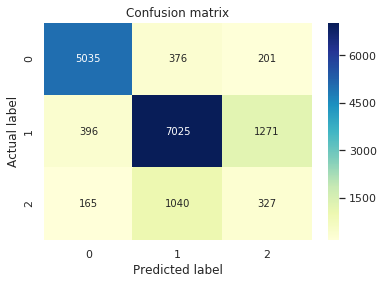

In [96]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define fig size 
plt.figure(figsize=(6,4))

# define the possible classes of mushrooms
class_names=[0,1,2] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [97]:
# define the decision tree feature importance variable 
feature_imp = pd.Series(dt.feature_importances_,index=df.iloc[:,:-1].columns).sort_values(ascending=False)

# print the results 
feature_imp

f12    0.255890
f25    0.138571
f3     0.126865
f2     0.051082
f1     0.040016
f0     0.039126
f24    0.032688
f23    0.029560
f77    0.029110
f11    0.018259
f8     0.016163
f10    0.015714
f16    0.015688
f15    0.015022
f20    0.014111
f7     0.013409
f9     0.011271
f6     0.010283
f32    0.008391
f74    0.007946
f18    0.007851
f59    0.007552
f31    0.006997
f64    0.005523
f55    0.005463
f45    0.005281
f19    0.005003
f54    0.004730
f34    0.004187
f75    0.003971
         ...   
f39    0.001091
f53    0.000973
f68    0.000945
f35    0.000940
f40    0.000897
f49    0.000794
f58    0.000732
f72    0.000697
f76    0.000581
f41    0.000564
f63    0.000528
f22    0.000524
f46    0.000515
f60    0.000433
f70    0.000410
f69    0.000398
f43    0.000378
f61    0.000335
f71    0.000309
f38    0.000298
f27    0.000298
f66    0.000206
f67    0.000103
f52    0.000067
f65    0.000046
f47    0.000000
f28    0.000000
f5     0.000000
f4     0.000000
f21    0.000000
Length: 78, dtype: float

In [10]:
# save the results to a dataframe and csv file 
dfi_dt = pd.DataFrame(feature_imp)
dfi_dt.to_csv('feature_imp/tweaked_mm_tt_dt.csv')

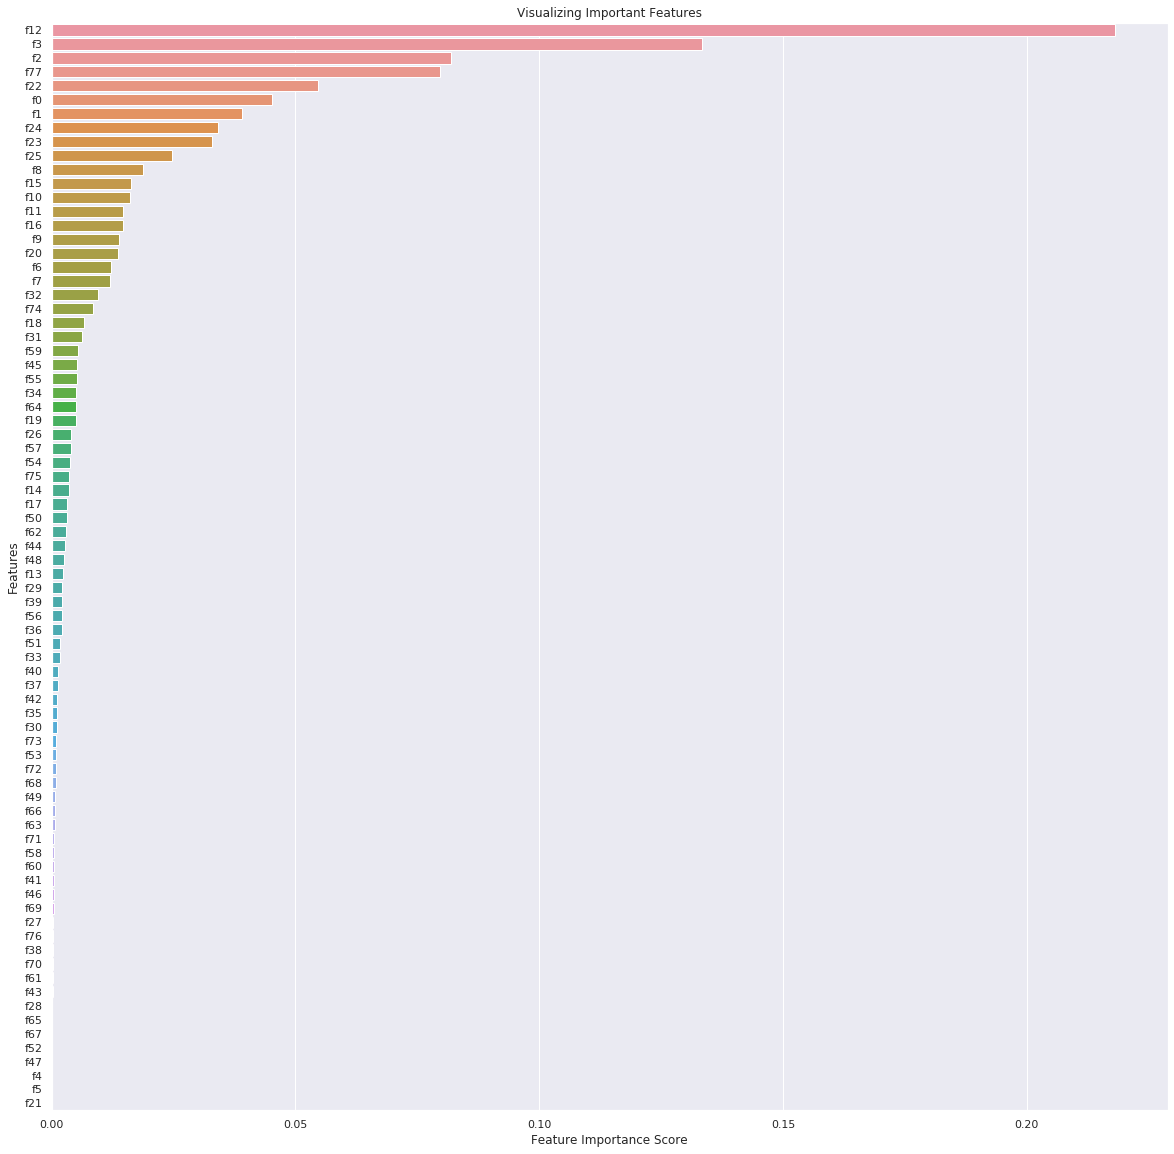

<Figure size 432x288 with 0 Axes>

In [11]:
# visualize the decision tree feature importance results  
plt.figure(figsize=(20,20))

# Create plot
sns.barplot(y=feature_imp.index, x=feature_imp)

# Add labels & title 
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# save figure 
plt.savefig('images/mm_tt_dt_tweaked_feature_importance.PNG')

## 2. SVM

In [12]:
# define the svm model 
svc = SVC(kernel='rbf', gamma='auto', random_state=2019)

# fit svm model 
svc = svc.fit(X_train_resample, Y_train_resample)

# predict the target 
Y_pred = svc.predict(X_test)

In [13]:
# print F1 score for the svm model 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# print classification report and confusion matrix 
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.7692377495252767
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      5612
           1       0.88      0.67      0.76      8692
           2       0.21      0.44      0.29      1532

    accuracy                           0.75     15836
   macro avg       0.66      0.69      0.65     15836
weighted avg       0.82      0.75      0.77     15836

[[5348  132  132]
 [ 518 5802 2372]
 [ 205  649  678]]


Text(0.5, 12.5, 'Predicted label')

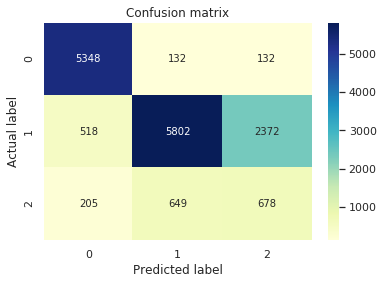

In [14]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define the possible classes of mushrooms
class_names=[0,1,2] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 3. KNeighbors

In [15]:
# define the kneighbors model 
kn = KNeighborsClassifier()

# fit the model 
kn = kn.fit(X_train_resample, Y_train_resample)

# predict the target 
Y_pred = kn.predict(X_test)

In [16]:
# print F1 score for the kneighborsclassifier model 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# print the classification report and confusion matrix 
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.7299933834097982
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5612
           1       0.83      0.66      0.74      8692
           2       0.15      0.34      0.21      1532

    accuracy                           0.70     15836
   macro avg       0.62      0.62      0.60     15836
weighted avg       0.78      0.70      0.73     15836

[[4787  392  433]
 [ 518 5772 2402]
 [ 207  808  517]]


Text(0.5, 12.5, 'Predicted label')

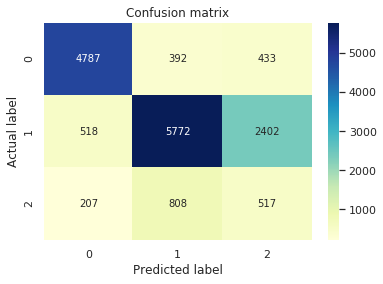

In [17]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define the possible classes of mushrooms
class_names=[0,1,2] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 4. AdaBoost

In [18]:
# define the adaboost model 
ada = AdaBoostClassifier(random_state=2019)

# fit the model 
ada = ada.fit(X_train_resample, Y_train_resample)

# predict the target
Y_pred = ada.predict(X_test)

In [19]:
# print the F1 score for the adaboost model 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# print the classification report and confusion matrix 
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.7351233908471068
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      5612
           1       0.88      0.58      0.70      8692
           2       0.19      0.50      0.27      1532

    accuracy                           0.71     15836
   macro avg       0.65      0.68      0.63     15836
weighted avg       0.81      0.71      0.74     15836

[[5399  143   70]
 [ 488 5012 3192]
 [ 212  560  760]]


Text(0.5, 12.5, 'Predicted label')

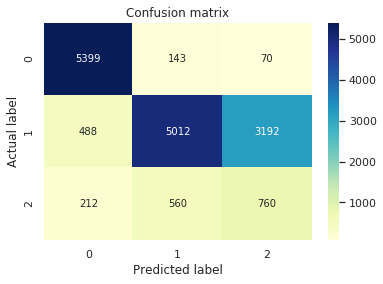

In [20]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define the possible classes of mushrooms
class_names=[0,1,2] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
# define the adaboost feature importance variable 
ada_feature_imp = pd.Series(ada.feature_importances_,index=df.iloc[:,:-1].columns).sort_values(ascending=False)

# print the results 
ada_feature_imp

f25    0.12
f12    0.12
f77    0.10
f3     0.10
f0     0.10
f8     0.06
f22    0.04
f59    0.02
f20    0.02
f19    0.02
f18    0.02
f16    0.02
f15    0.02
f33    0.02
f54    0.02
f57    0.02
f23    0.02
f36    0.02
f10    0.02
f9     0.02
f62    0.02
f7     0.02
f35    0.02
f2     0.02
f1     0.02
f27    0.00
f26    0.00
f29    0.00
f30    0.00
f31    0.00
       ... 
f69    0.00
f68    0.00
f67    0.00
f66    0.00
f65    0.00
f64    0.00
f63    0.00
f61    0.00
f60    0.00
f58    0.00
f56    0.00
f55    0.00
f53    0.00
f51    0.00
f71    0.00
f50    0.00
f49    0.00
f48    0.00
f47    0.00
f46    0.00
f45    0.00
f44    0.00
f43    0.00
f42    0.00
f41    0.00
f40    0.00
f39    0.00
f76    0.00
f37    0.00
f38    0.00
Length: 78, dtype: float64

In [22]:
# save the results to a dataframe and csv file 
ada_fi = pd.DataFrame(ada_feature_imp)
ada_fi.to_csv('feature_imp/tweaked_mm_tt_ada.csv')

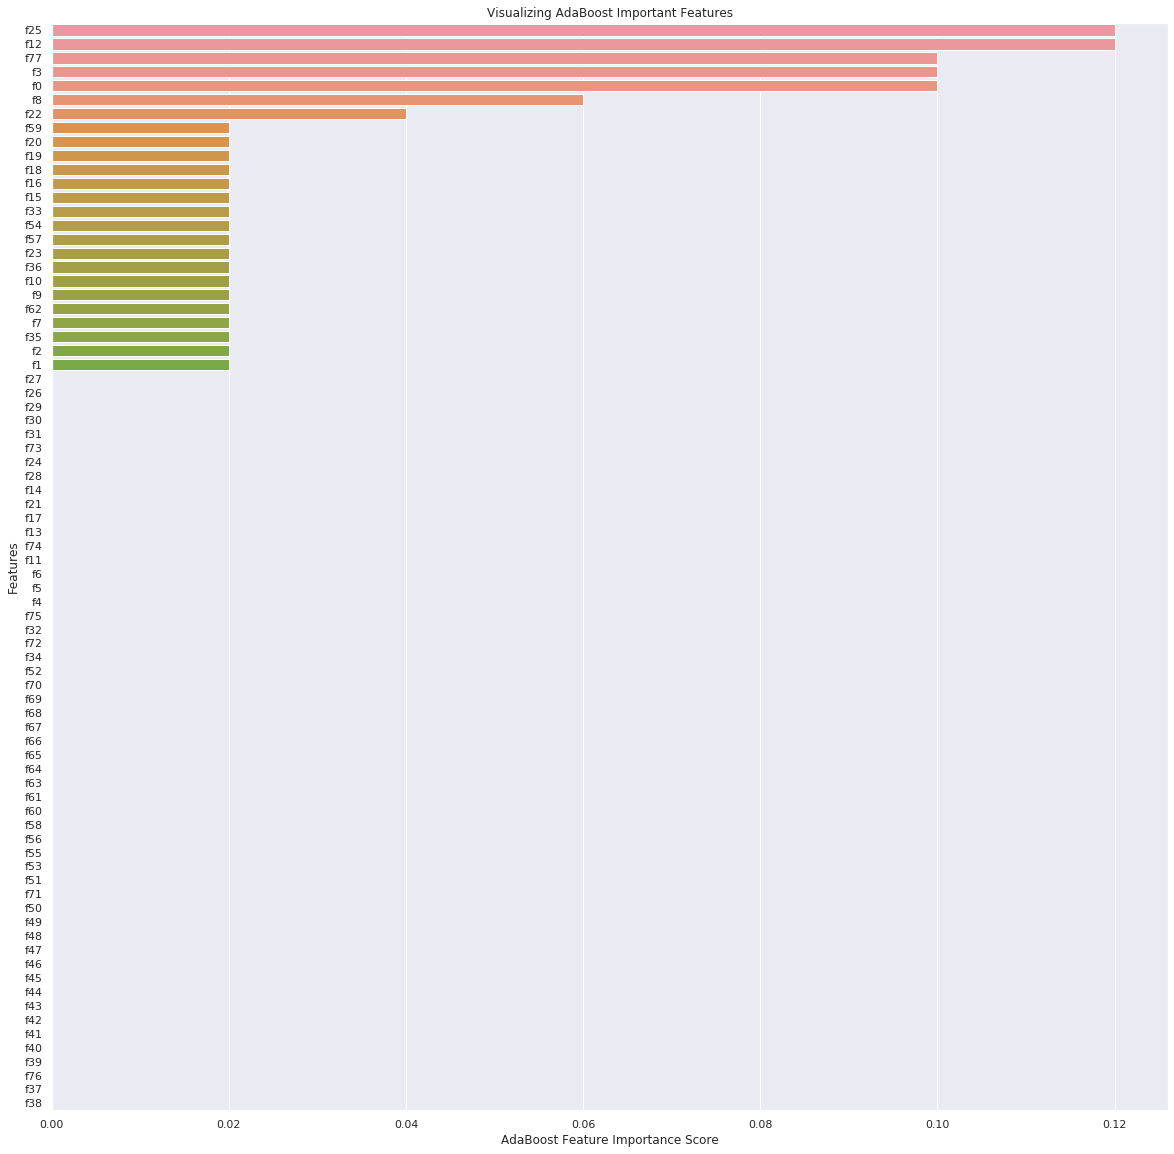

<Figure size 432x288 with 0 Axes>

In [23]:
# visualize the adaboost feature importance results 
plt.figure(figsize=(20,20))

# Create plot
sns.barplot(y=ada_feature_imp.index, x=ada_feature_imp)

# Add labels & title 
plt.xlabel('AdaBoost Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing AdaBoost Important Features")
plt.show()

# save figure 
plt.savefig('images/mm_tt_ada_tweaked_feature_importance.PNG')

### 5. XGBoost

In [24]:
# build xgboost model
xg = xgb.XGBClassifier(n_estimators=100, max_depth=25, learning_rate=0.1, colsample_bytree=0.4, random_state=2019)

# fit the training data to the model
xg = xg.fit(X_train_resample,Y_train_resample) 

# predict target 
Y_pred=xg.predict(X_test)

In [25]:
# print F1 score for xgboost model 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# print classification report and confusion matrix 
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.8222195570073928
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      5612
           1       0.85      0.90      0.87      8692
           2       0.24      0.13      0.17      1532

    accuracy                           0.84     15836
   macro avg       0.67      0.66      0.66     15836
weighted avg       0.81      0.84      0.82     15836

[[5269  266   77]
 [ 326 7792  574]
 [ 174 1156  202]]


Text(0.5, 12.5, 'Predicted label')

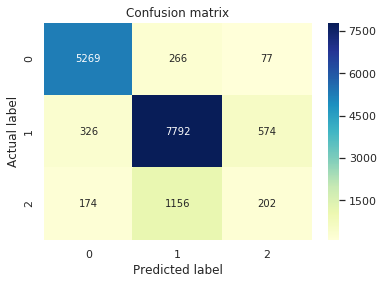

In [26]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define the possible classes of mushrooms
class_names=[0,1,2] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [27]:
# define the xgboost feature importance variable 
xgb_feature_imp = pd.Series(xg.feature_importances_,index=df.iloc[:,:-1].columns).sort_values(ascending=False)

# print the results 
xgb_feature_imp

f12    0.878787
f25    0.020809
f22    0.012970
f77    0.006843
f14    0.005804
f59    0.003828
f20    0.001912
f10    0.001605
f19    0.001511
f3     0.001508
f9     0.001429
f15    0.001331
f2     0.001275
f41    0.001202
f11    0.001191
f7     0.001189
f43    0.001155
f8     0.001145
f29    0.001141
f36    0.001137
f16    0.001136
f63    0.001122
f51    0.001117
f46    0.001107
f30    0.001094
f50    0.001085
f69    0.001077
f67    0.001069
f17    0.001061
f61    0.001047
         ...   
f49    0.000969
f54    0.000962
f33    0.000955
f37    0.000950
f26    0.000948
f62    0.000946
f70    0.000945
f45    0.000943
f34    0.000943
f66    0.000936
f75    0.000935
f72    0.000923
f71    0.000922
f42    0.000918
f23    0.000918
f24    0.000880
f40    0.000878
f27    0.000870
f44    0.000848
f74    0.000840
f0     0.000837
f65    0.000804
f18    0.000773
f28    0.000765
f76    0.000642
f52    0.000583
f47    0.000351
f21    0.000000
f5     0.000000
f4     0.000000
Length: 78, dtype: float

In [28]:
# save the results to a dataframe and csv file 
dfi_xg = pd.DataFrame(xgb_feature_imp)
dfi_xg.to_csv('feature_imp/tweaked_mm_tt_xgb.csv')

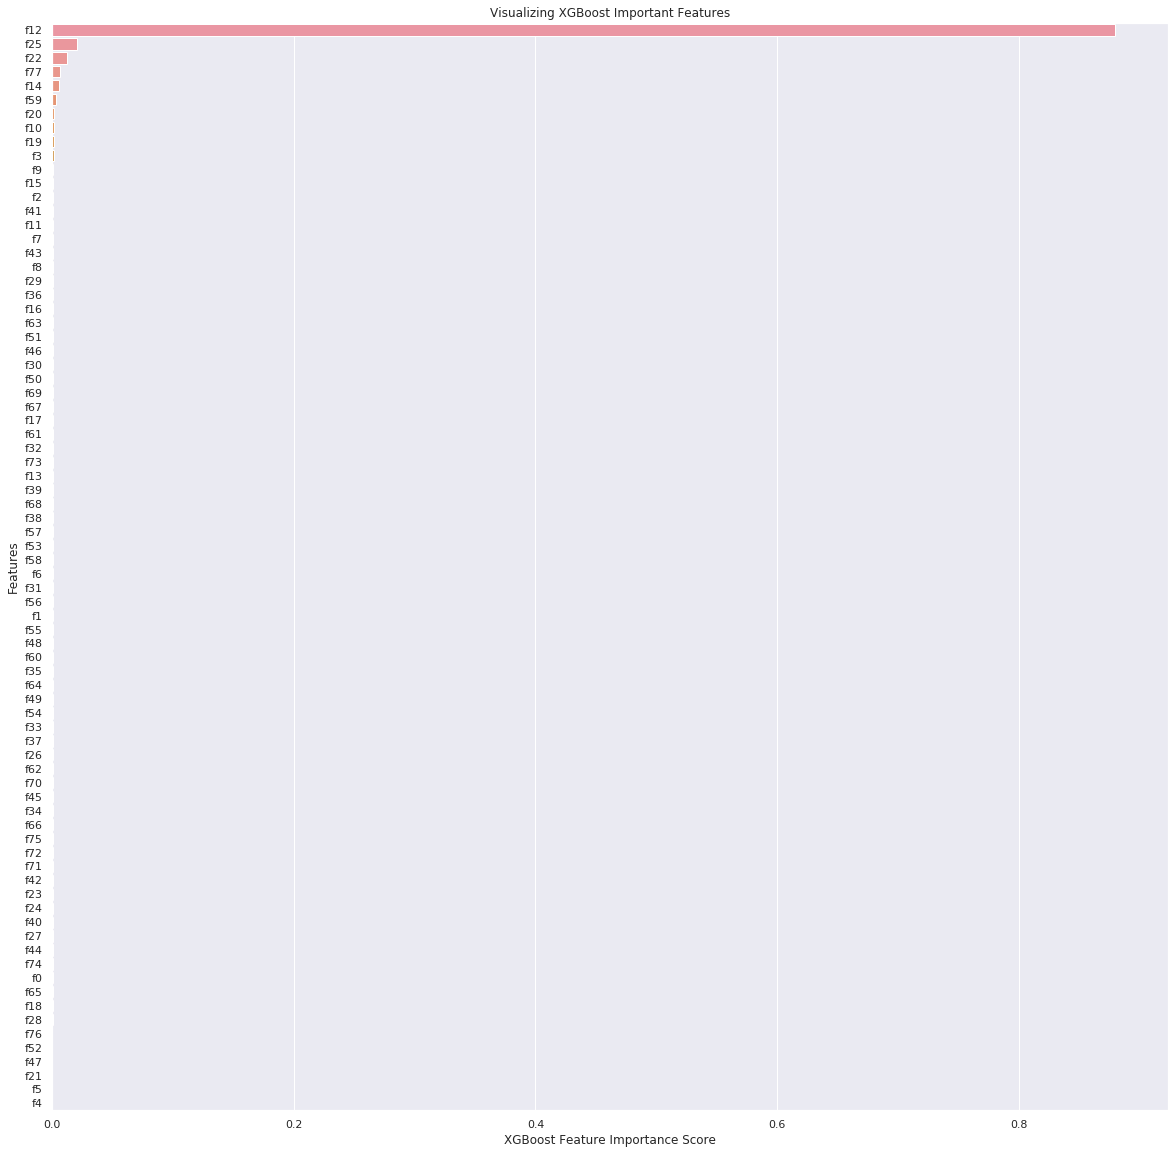

<Figure size 432x288 with 0 Axes>

In [29]:
# visualize the adaboost feature importance results 
plt.figure(figsize=(20,20))

# Create plot
sns.barplot(y=xgb_feature_imp.index, x=xgb_feature_imp)

# Add labels & title 
plt.xlabel('XGBoost Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing XGBoost Important Features")
plt.show()

# save figure 
plt.savefig('images/mm_tt_xgb_tweaked_feature_importance.PNG')

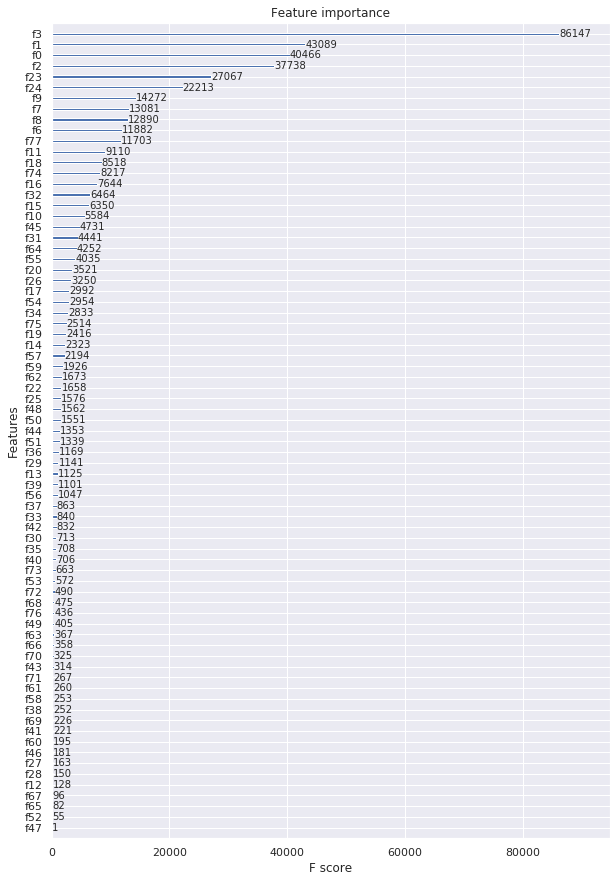

<Figure size 720x720 with 0 Axes>

In [39]:
# visualize the xgboost feature importances 
xgb.plot_importance(xg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()
plt.savefig('images/mm_tt_xgbtweaked_other_feature_importance.PNG')

## 6. Random Forest

In [31]:
# build random forest model 
rf = RandomForestClassifier(n_estimators=100, max_depth=23, min_samples_split=5,
                            min_samples_leaf=1, max_features=35, random_state=2019)

# fit model 
rf = rf.fit(X_train_resample, Y_train_resample)

# predict the target 
Y_pred = rf.predict(X_test)

In [32]:
# print F1 score for the random forest model 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))

# print the classification report and confusion matrix 
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.8212508006712126
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      5612
           1       0.85      0.88      0.86      8692
           2       0.25      0.17      0.20      1532

    accuracy                           0.83     15836
   macro avg       0.67      0.66      0.66     15836
weighted avg       0.81      0.83      0.82     15836

[[5298  225   89]
 [ 381 7612  699]
 [ 179 1091  262]]


Text(0.5, 66.5, 'Predicted label')

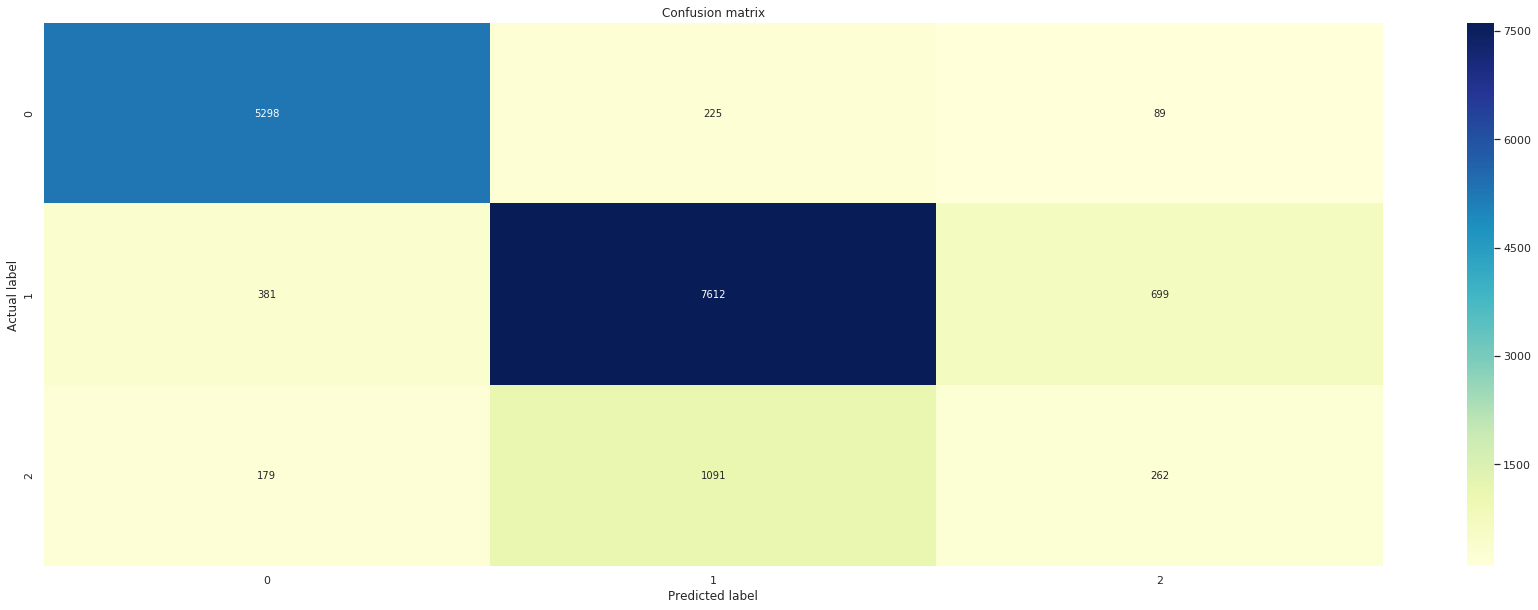

In [33]:
# create the confusion matrix using the testing data and the model's predictions for the dependent variable (class)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

# define the possible classes of mushrooms
class_names=[0,1,2] 

# set tickmark locations 
tick_marks = np.arange(len(class_names))

# set the tickmark lables 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of the confusion matirx, annotate heatmap with data values, set the colors, format data values
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# add title & labels
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
# define the random forest feature importance variable
rf_feature_imp = pd.Series(rf.feature_importances_,index=df.iloc[:,:-1].columns).sort_values(ascending=False)

# print the results 
rf_feature_imp

f12    0.220538
f3     0.119324
f77    0.089609
f25    0.082979
f2     0.053484
f0     0.041116
f1     0.041037
f22    0.029680
f24    0.028498
f23    0.028398
f8     0.017592
f9     0.016689
f14    0.015769
f15    0.015549
f10    0.014796
f7     0.014536
f20    0.014331
f11    0.014057
f16    0.013887
f6     0.012235
f74    0.008271
f32    0.008217
f18    0.007458
f59    0.007109
f31    0.005818
f19    0.005476
f64    0.005089
f55    0.004634
f45    0.004474
f26    0.004168
         ...   
f30    0.001166
f35    0.001062
f73    0.001059
f40    0.000957
f53    0.000921
f68    0.000801
f72    0.000762
f49    0.000671
f63    0.000501
f58    0.000465
f70    0.000416
f69    0.000375
f76    0.000367
f41    0.000356
f66    0.000354
f46    0.000350
f71    0.000327
f38    0.000324
f43    0.000317
f61    0.000297
f60    0.000293
f27    0.000268
f67    0.000115
f65    0.000109
f52    0.000043
f28    0.000028
f47    0.000001
f21    0.000000
f5     0.000000
f4     0.000000
Length: 78, dtype: float

In [35]:
# save results to a dataframe and csv file 
dfi_rf = pd.DataFrame(rf_feature_imp)
dfi_rf.to_csv('feature_imp/tweaked_mm_tt_rf.csv')

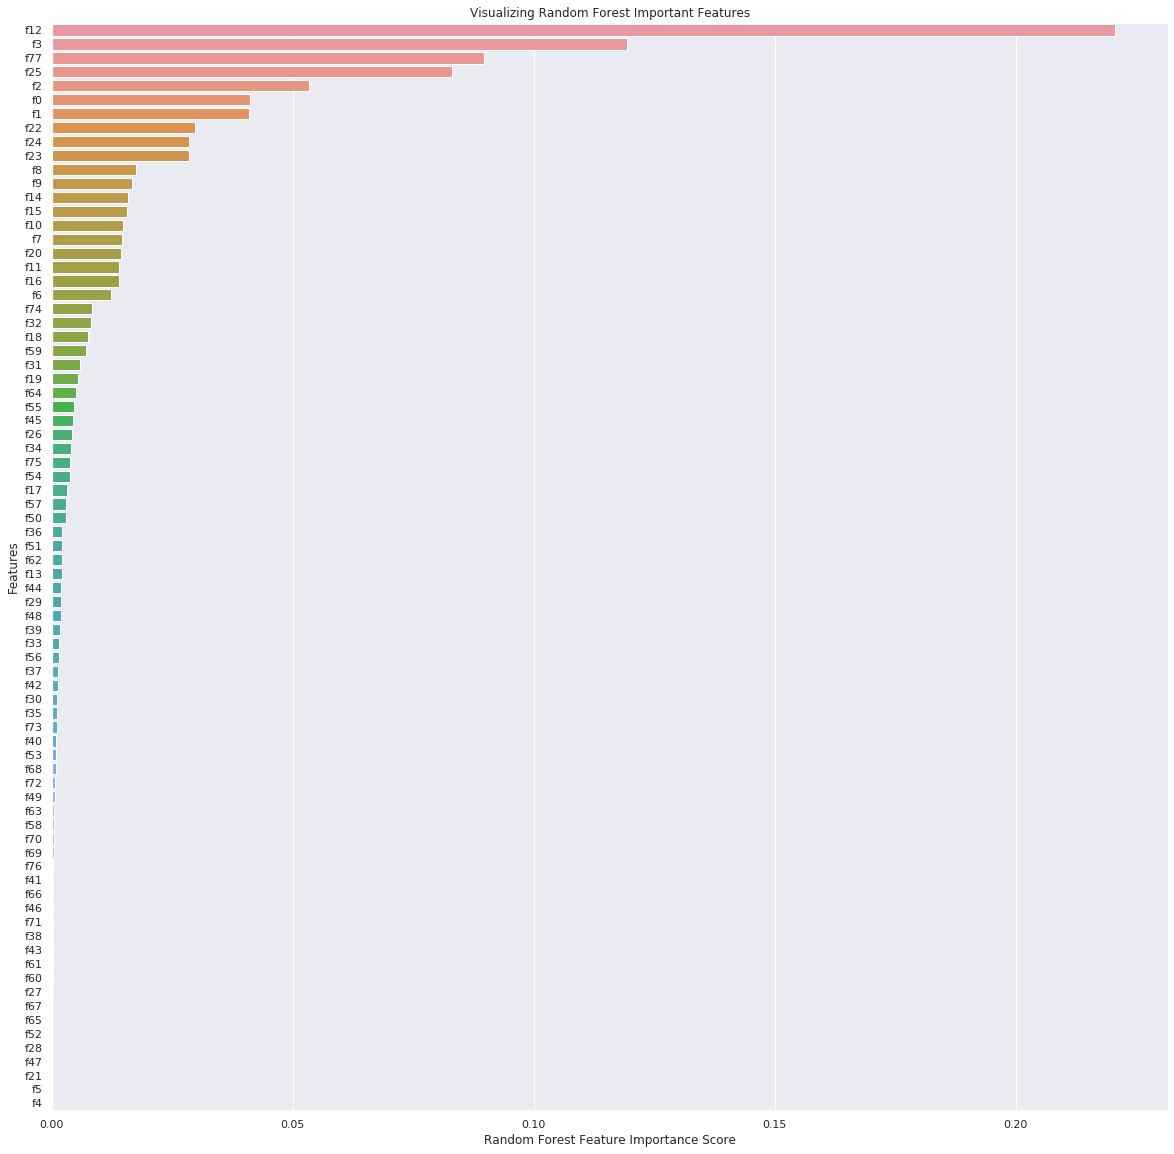

<Figure size 2160x720 with 0 Axes>

In [36]:
# visualize the random forest feature importance results  
plt.figure(figsize=(20,20))

# Create plot
sns.barplot(y=rf_feature_imp.index, x=rf_feature_imp)

# Add labels & title 
plt.xlabel('Random Forest Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Random Forest Important Features")
plt.show()

# save figure
plt.savefig('images/mm_tt_rf_tweaked_feature_importance.PNG')